### CS102 - Further Computing

Mark Howard<br>
School of Mathematical & Statistical Sciences<br>
NUI Galway<br>
mark.howard@nuigalway.ie

### 4. Aspects of Machine Learning
* Continuing on with our use of scikit learn to explore different models of ML
* Today: Regression, leading in to model validation 


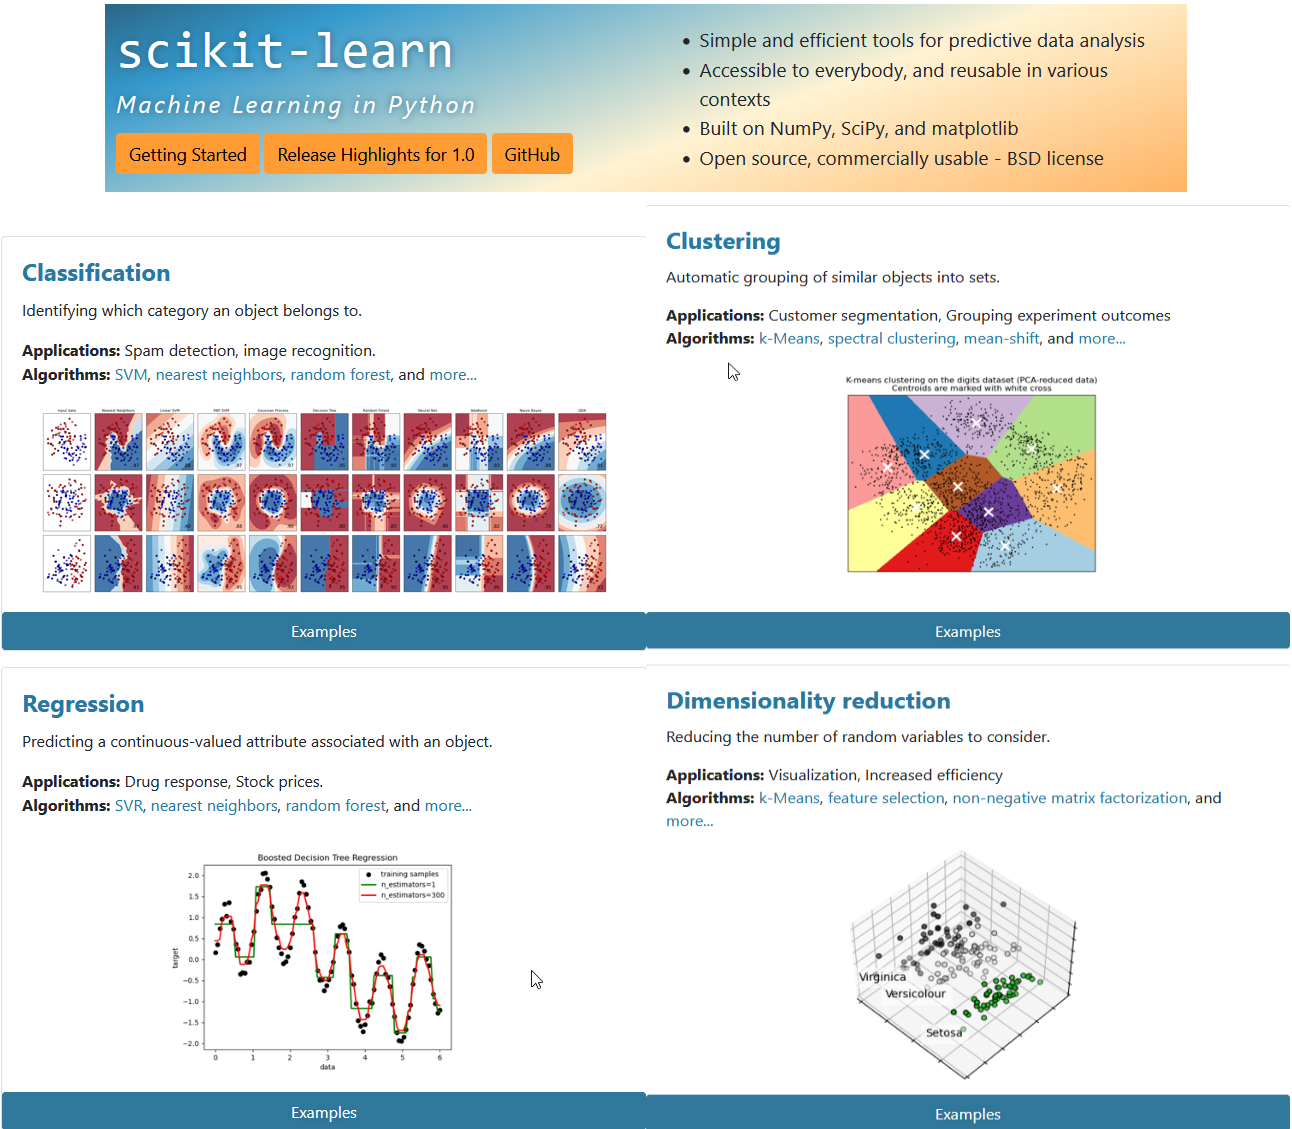

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] #This is just changing default size in Jupyter NB
plt.rcParams['figure.dpi'] = 100 # Ditto

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


### Supervised Learning
Supervised Learning is further subdivided into 
* **Classification tasks:** Here the labels are **discrete** categories
* **Regression tasks**:  Here the labels are **continuous** quantities. <br>


Today: Regression, leading in to model validation 

### Regression
Linear regression is a basic and commonly used type of predictive analysis

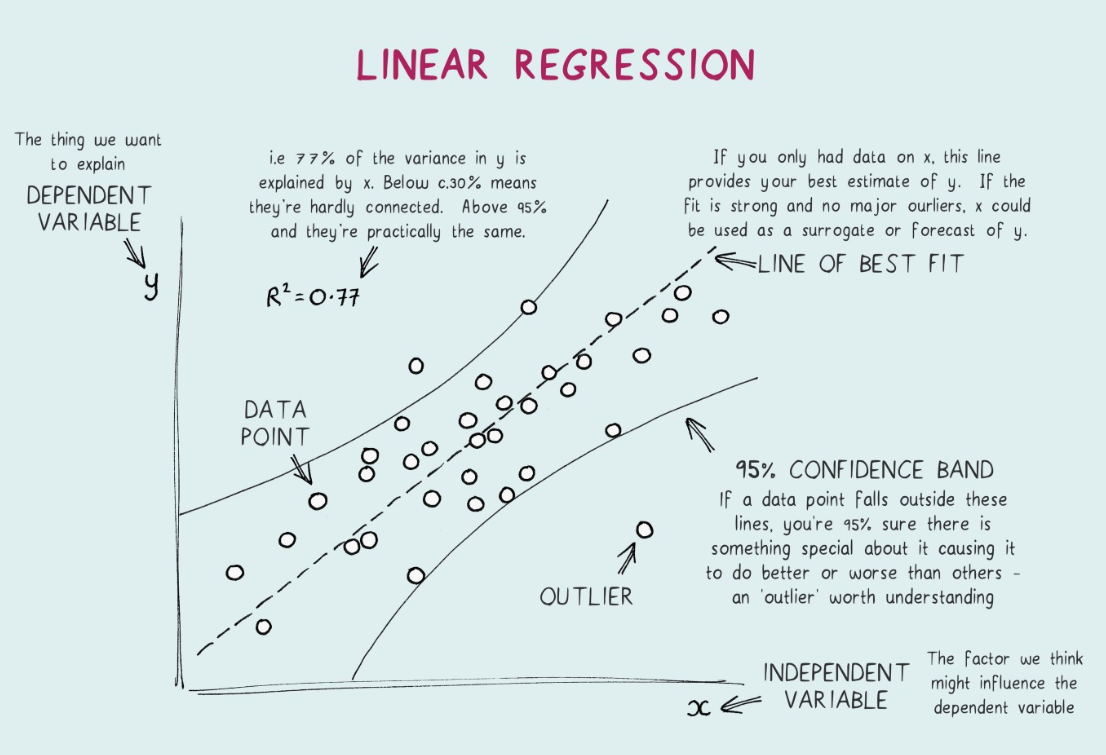

* We will start with the most familiar linear regression, a straight-line fit to data.

* A straight-line fit is a model of the form
$$
y = ax + b
$$
where 
    * $a$ is commonly known as the *slope*, and
    * $b$ is commonly known as the *intercept*.

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) #the data will go from 0 to 10 
y = 2 * x - 5 + rng.randn(50) #(1) Compare with y=ax+b (2) rng.randn(50) is some random noise added -- to make it like the real world 

Consider the data generated above, which is scattered about a line with a slope of 2 and an intercept of -5:

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [ ]:
plt.scatter(x, y);plt.xlabel("x", fontsize=18);plt.ylabel("y", fontsize=18);

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y);plt.xlabel("x", fontsize=18);plt.ylabel("y", fontsize=18);
plt.plot(xfit, yfit);
print("Model slope:    ", f'{model.coef_[0]:.4}')
print("Model intercept:", f'{model.intercept_:.4}')

#### Multi-dimensional datasets

* The ``LinearRegression`` estimator is much more capable than the simple straight-line fit we just did. 
* It can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
* Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but it is still easy for a computer to do.

* **Example:** Predict the **sale price (a continuous variable!)** of a house in California using Multilinear Regession

### Import and get to know your data

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing.frame.head()

In [ ]:
print(housing.DESCR)

In [ ]:
housing.feature_names

In [ ]:
housing.target_names

* median income: Median income for households within a block of houses (measured in \$10,000 US Dollars)
* housing median age: Median age of a house within a block; a lower number is a newer building
* average rooms: average number of rooms
* average bedrooms: average number of bedrooms
* population: Total number of people residing within a block
* longitude: A measure of how far west a house is; a more negative value is farther west
* latitude: A measure of how far north a house is; a higher value is farther north

**target variable**
* median house value: Median house value for households within a block (measured in \$100,000 US Dollars)

In [ ]:
housing.target[0:4]

In [ ]:
housing.frame.head()

In [ ]:
sns.displot(housing.frame['MedHouseVal']);

In [ ]:
for index, feature_name in enumerate(housing.feature_names):
    sns.relplot(data=housing.frame, x=feature_name, y='MedHouseVal')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8] #This is just changing default size in Jupyter NB
plt.rcParams['figure.dpi'] = 100 # Ditto
import seaborn as sns
corrmat = housing.frame.corr()
sns.heatmap(corrmat, annot = True, square = True);

* Investigate the (anti-)correlation between longitude and latitude

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
plt.scatter(housing.frame['Longitude'],housing.frame['Latitude'], alpha=0.2);
plt.xlabel('Longitude');plt.ylabel('Latitude');plt.axis('equal');

* Does this shape look familiar?....

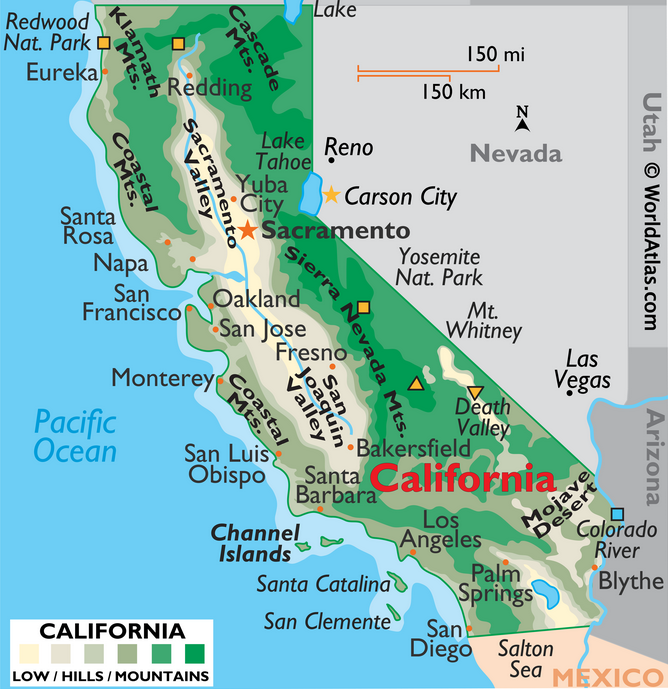

### Build a model 
* Now let's  fit a multidimensional linear model of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where 
* $y$ (the target) is `MedHouseVal` 
* $x_i$ are the features ['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude'] so that $x_1$ is `MedInc` and so on. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,random_state=42)

clf = LinearRegression()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(6, 4));plt.scatter(expected, predicted)
plt.plot([0, 5], [0, 5], '--k');plt.axis('tight')
plt.xlabel('True price ($100k)');plt.ylabel('Predicted price ($100k)');
plt.tight_layout()

What we have done is to fit a multidimensional linear model of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where 
* $y$ (the target) is `MedHouseVal` 
* $x_i$ are the features ['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude'] so that $x_1$ is `MedInc` and so on. 
* The $a_i$ are **coefficients**. For example $a_1$ is the coefficient of `MedInc` in the regression equation.


In [ ]:
pd.Series(clf.coef_,index=housing.feature_names)

* These coefficients are easily interpretable e.g., `MedHouseVal` goes up by 0.4476 units per unit increase in `MedInc` (which makes intuitive sense).
* It is tempting to think that the coefficients tell you the importance of various different features. Unfortunately, they are sensitive to scale. 

### Evaluate the model
* With classification models, we checked how much of the test/validation data we correctly labelled
* With regression models, one can check success by evaulating $R^2 \leq 1$.

In [ ]:
# using the function score() to see the accuracy of our model based on our test variables
print("Accuracy Score:", clf.score(X_test, y_test))

In [ ]:
#calculating r_square
rss = np.sum(np.square((predicted - expected)))
mean = np.mean(y_test)
sst = np.sum(np.square(y_test-mean))
r_square = 1 - (rss/sst)
print(r_square)

## The Bias-variance trade-off
Considerations on how best to choose your ML model 

In [ ]:
# Some helper functions for the next few pictures
def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [ ]:
# raw code for the next figure
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)# A simple (high-bias) model
model20 = PolynomialRegression(20).fit(X, y)# A complex (high variance) model

fig, ax = plt.subplots(1, 2, figsize=(16, 6));
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1);

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14);
plt.close(fig)

### Overfitting and Model Selection
We discussed the dangers of overfitting in the last class
* Models that are overly simple ("high bias") don't capture the behaviour properly
* Models that are overly complex ("high variance") don't perform well on validation/test data

In [ ]:
fig

In [ ]:
# raw code for the next figure
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X2, y2 = make_data(10, rseed=42)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red');
plt.close(fig)

* The score below is the $R^2$ score which measures how well a model performs: 
    * $R^2$=1 indicates a perfect match
    * $R^2$=0 indicates the model does no better than simply taking the mean of the data

* For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
* For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.


In [ ]:
fig

In [ ]:
# raw code for the next figure
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

fig, ax = plt.subplots()
ax.plot(x, y2, lw=10, alpha=0.5, color='blue')
ax.plot(x, y1, lw=10, alpha=0.5, color='red')

ax.text(0.15, 0.2, "training score", rotation=45, size=16, color='blue')
ax.text(0.2, -0.05, "validation score", rotation=20, size=16, color='red')

ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=18, rotation=90, va='center')
ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Validation Curve Schematic", size=16)
plt.close(fig)

* We have a knob we can turn to control the complexity of the model (the degree/"wiggliness" of the polynomial)
* When we do that and plot the result we get the following behaviour
   * The training score is everywhere higher than the validation score.
   * For very low model complexity, the training data is under-fit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
   * For very high model complexity, the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data.
   * For some intermediate value, the validation curve has a maximum. This level of complexity indicates a **suitable trade-off between bias and variance.**


In [ ]:
fig

In [ ]:
N = np.linspace(0, 1, 1000)
y1 = 0.75 + 0.2 * np.exp(-4 * N)
y2 = 0.7 - 0.6 * np.exp(-4 * N)

fig, ax = plt.subplots()
ax.plot(x, y1, lw=10, alpha=0.5, color='blue')
ax.plot(x, y2, lw=10, alpha=0.5, color='red')

ax.text(0.2, 0.88, "training score", rotation=-10, size=16, color='blue')
ax.text(0.2, 0.5, "validation score", rotation=30, size=16, color='red')

ax.text(0.98, 0.45, r'Good Fit $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel(r'training set size $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Learning Curve Schematic", size=16)
plt.close(fig)

* Another aspect of model complexity to note is that **the optimal model will generally depend on the size of your training data.** 
* A plot of the training/validation score with respect to the size of the training set is known as a learning curve.
    * A model of a given complexity will **overfit a small dataset**: therefore training score = high, validation score=low.
    * A model of a given complexity will **underfit a large dataset**: training score decreases, validation score increases.
    * Validation score won't be better than training score
* This means the curves should keep getting closer together but never cross.


In [ ]:
fig

* The preceding discussion is meant to give you some intuition into the trade-off between bias and variance, and its dependence on model complexity and training set size. 
* In practice, models generally have more than one knob to turn, and thus plots of validation and learning curves change from lines to multi-dimensional surfaces. 
* In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score.
* Scikit-Learn provides automated tools to do this in the model selection module

In [ ]:
X, y = make_data(40)
plt.scatter(X.ravel(), y);

In [ ]:
# Search over polynomial degree, and whether or not to normalize/fit intercept
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [ ]:
#grid.fit will loop through predefined hyperparameters and fit your model on your training set
grid.fit(X, y);
grid.best_params_

In [ ]:
# Depict our model as a line
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
#plt.plot(X_test.ravel(), y_test, hold=True);
plt.plot(X_test.ravel(), y_test);plt.axis(lim);

#### References
Further Reading<br>
* [Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)
* [In Depth: Linear Regression](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)

#### Exercises
* Peruse other attempts at predicting California house prices via on the online ML community [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices)